## Anomaly detection using STL 

In [33]:
#Importing necessary libraries
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("g.csv")
data = data.dropna()
data = data.reset_index()
labels = data['label']
data.set_index("timestamp", inplace=True)

stl = STL(data["value"], period=7).fit()

residuals = stl.resid #Calculating the residuals

# setting a threshold for identifying anomalies
threshold = 3 * residuals.std()

predictions = [1 if abs(res) > threshold else 0 for res in residuals] #Predicting the anomalies


In [14]:
labels

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
142534    0.0
142535    0.0
142536    0.0
142537    0.0
142538    0.0
Name: label, Length: 142539, dtype: float64

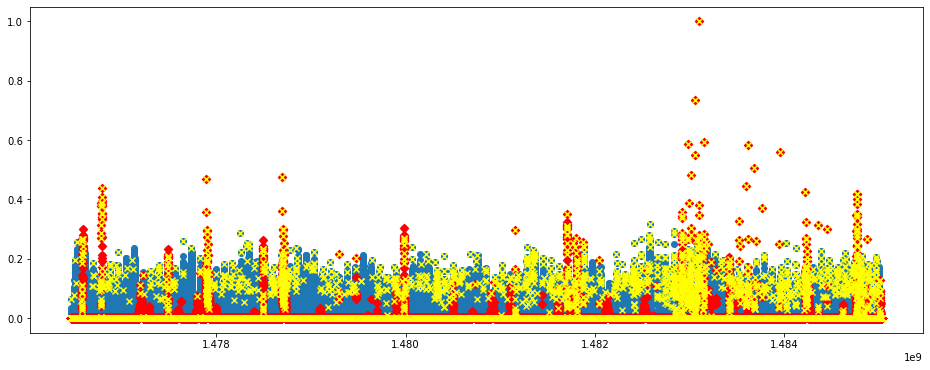

In [36]:
#Plotting original data in blue, true_anomalies in red and predicted anomalies in yellow
plt.figure(figsize=(16,6))
plt.scatter(data.index, data['value'], zorder=1, label = 'original data')
plt.scatter(data.index, data['label']*data['value'], color='r', marker='D', zorder=2, label = 'true anomalies')
plt.scatter(data.index, predictions * data['value'], color='yellow', marker='x', zorder=3, label = 'predicted anomalies')
plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()

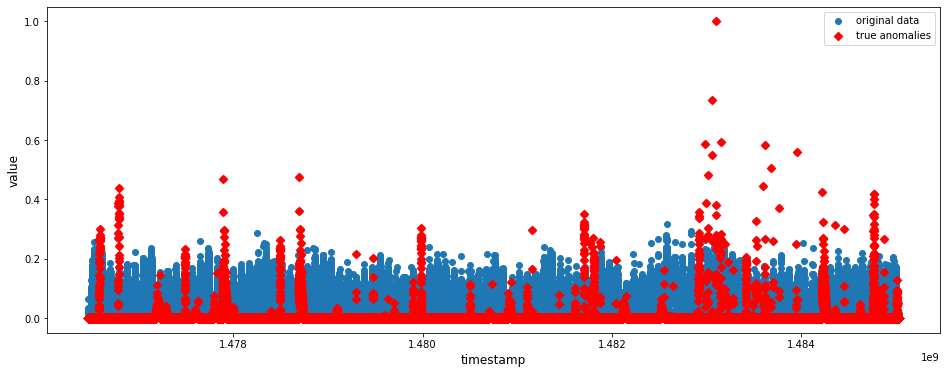

In [40]:
#Original anomalies of the dataset
plt.figure(figsize=(16,6))
plt.scatter(data.index, data['value'], zorder=1, label = 'original data')
plt.scatter(data.index, data['label']*data['value'], color='r', marker='D', zorder=2, label = 'true anomalies')

plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()


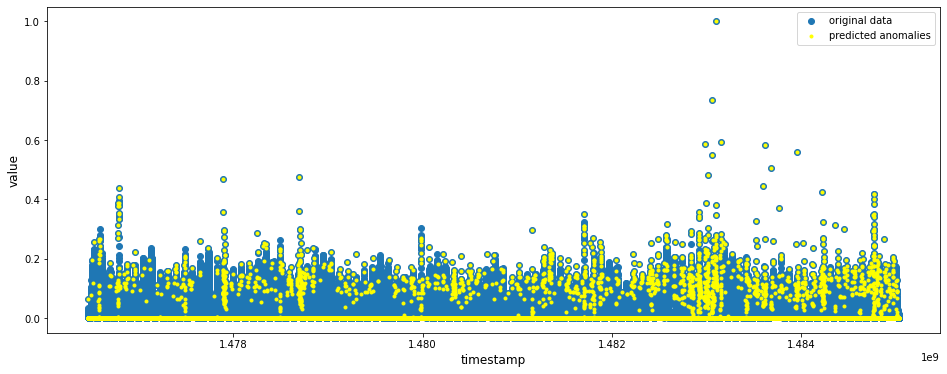

In [41]:
#Predicted anomalies
plt.figure(figsize=(16,6))
plt.scatter(data.index, data['value'], zorder=1, label = 'original data')
plt.scatter(data.index, predictions * data['value'], color='yellow', marker='.', zorder=3, label = 'predicted anomalies')

plt.ylabel('value', fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.legend()
plt.show()